<a href="https://colab.research.google.com/github/behrangEhi/ML-DL-Projects/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network

In [ ]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt
import pandas as pd


class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        self.activation_function = expit
        self.inverse_activation_function = logit
        self.w_i_h = np.random.normal(0, pow(self.input_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.w_h_o = np.random.normal(0, pow(self.hidden_nodes, -0.5), (self.output_nodes, self.hidden_nodes))

    def train(self, input_list, targets_list):
        inputs = np.array(input_list, ndmin=2).T
        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)
        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)
        targets = np.array(targets_list, ndmin=2).T
        output_errors = targets - o_output
        hidden_errors = np.dot(self.w_h_o.T, output_errors)
        self.w_h_o += self.learning_rate * np.dot(output_errors * o_output * (1-o_output), o_hidden.T)
        self.w_i_h += self.learning_rate * np.dot(hidden_errors * o_hidden * (1-o_hidden), inputs.T)

    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)
        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)
        return o_output

train_list = pd.read_csv('mnist_train.csv')
test_list = pd.read_csv('mnist_test.csv')

input_nodes = 784
hidden_nodes = 150
output_nodes = 10
learning_rate = 0.05
epochs = 6

nn = NeuralNetwork(input_nodes=input_nodes, hidden_nodes=hidden_nodes, output_nodes=output_nodes, learning_rate=learning_rate)

for e in range(epochs):
    for _, row in train_list.iterrows():
        inputs = (np.asfarray(row[1:]) / (255.0 * 0.98)) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(row[0])] = 0.99
        nn.train(inputs, targets)

# Test the neural network

Target number is: 9
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


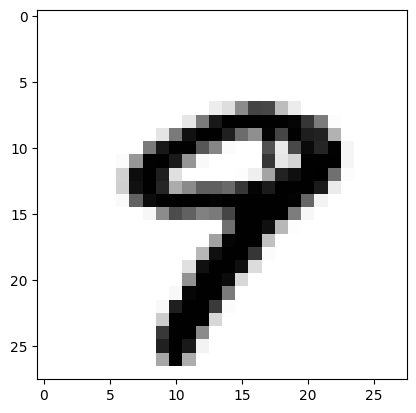

In [ ]:
test_row_data = test_list.iloc[8].values
print("Target number is:", test_row_data[0])
image_data = np.asfarray(test_row_data[1:]).reshape((28, 28))
image = plt.imshow(image_data, cmap='Greys')
result = nn.query((np.asfarray(test_row_data[1:]) / (255.0 * 0.98)) + 0.01)
result = np.nan_to_num(result)
print(result)

# Evaluate the neural network

In [ ]:
score_card = []
for _, row in test_list.iterrows():
  target_number = int(row[0])
  inputs = (np.asfarray(row[1:]) / 255 * 0.98) + 0.01
  outputs = nn.query(inputs)
  predicted_number = np.argmax(outputs)
  if target_number == predicted_number:
    score_card.append(1)
  else:
    score_card.append(0)

score_card_array = np.asarray(score_card)
print("\nNet Performance:", score_card_array.sum() / score_card_array.size)


Net Performance: 0.9735
